In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Feature selection 

In [7]:
# test on claims
claims = pd.read_csv('/Users/joy/Desktop/datathon/Datathon2020data/new_claim.csv')
claims['Age'] = claims['Age']//365
X_claim = claims.drop(['Fraud'], axis =1)
Y_claim = claims['Fraud']
X_claim = X_claim.fillna(0)
X_claim.shape

(558211, 28)

In [8]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, max_depth = 8,
                           min_samples_split= 0.3)
boruta = BorutaPy(estimator = rf, verbose=2, perc=90,
                  n_estimators = 'auto',
                  max_iter = 100)

In [9]:
boruta.fit(np.array(X_claim), np.array(Y_claim))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	14
Tentative: 	10
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	14
Tentative: 	10
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	14
Tentative: 	10
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	14
Tentative: 	10
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	8
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	8
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	8
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	8
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	8
Rejected: 

BorutaPy(estimator=RandomForestClassifier(max_depth=8, min_samples_split=0.3,
                                          n_estimators=81, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FB4D499D270),
         n_estimators='auto', perc=90,
         random_state=RandomState(MT19937) at 0x7FB4D499D270, verbose=2)

In [10]:
X_claim.columns[boruta.support_].to_list()

['AmtReimbursed',
 'DeductibleAmt',
 'Is_inpatient',
 'Age',
 'Race',
 'State',
 'County',
 'Chronic_Heartfailure',
 'Chronic_KidneyDisease',
 'Chronic_ObstrPulmonary',
 'NumOfClaimDays',
 'DiagnosisCode_Num',
 'ProcedureCode_Num',
 'ChronicDisease_Num',
 'PhysiciansNum',
 'AdmitDiagnosInDiagnos',
 'FullYearPlanA']

In [11]:
features = X_claim.columns[boruta.support_].to_list()
X = X_claim[features]
Y = Y_claim

# KNN Model

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

train = 0.7
test = 0.15
validation = 0.15
X_train, X_temp, Y_train, Y_temp =train_test_split(X, Y,train_size = train)
X_test, X_validation,Y_test, Y_validation = train_test_split(X_temp,Y_temp,test_size = test/(test+validation))
X_train.shape

(390747, 17)

In [13]:
# # Vectorize training data
# vectorizer = CountVectorizer()
# X_train = vectorizer.fit_transform(X_train)

In [14]:
X_train.shape

(390747, 17)

In [50]:
Y_train.shape

(390747,)

In [15]:
train_accuracy = []
validation_accuracy = []
for k in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_prediction = knn.predict(X_train)
    validation_prediction = knn.predict(X_validation)
    train_accuracy.append(metrics.accuracy_score(Y_train, train_prediction))
    validation_accuracy.append(accuracy_score(Y_validation,validation_prediction))

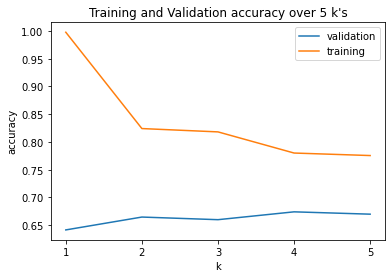

In [16]:
k = np.arange(1,6)
plt.plot(k, validation_accuracy, label = "validation")
plt.plot(k, train_accuracy, label = "training")
plt.xticks(np.arange(1, 6, 1.0))
plt.xlabel("k")
plt.ylabel('accuracy')
plt.legend()
plt.title("Training and Validation accuracy over 5 k's")
plt.show()

In [17]:
print("The k value that maximizes the validation accuracy is {}".format(np.argmax(validation_accuracy)+1))
max(validation_accuracy)

The k value that maximizes the validation accuracy is 4


0.674150862274877

In [18]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)
test_prediction = knn.predict(X_test)
accuracy = accuracy_score(Y_test, test_prediction)
print(accuracy)

0.6729804614723165


In [19]:
train_error = []
validation_error = []
train_accuracy = []
validation_accuracy = []
for k in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train, Y_train)
    train_prediction = knn.predict(X_train)
    train_mse = mean_squared_error(Y_train, train_prediction)
    train_error.append(np.sqrt(train_mse))
    validation_prediction = knn.predict(X_validation)
    validation_mse = mean_squared_error(Y_validation, validation_prediction)
    validation_error.append(np.sqrt(validation_mse))
    train_accuracy.append(metrics.accuracy_score(Y_train, train_prediction))
    validation_accuracy.append(accuracy_score(Y_validation, validation_prediction))

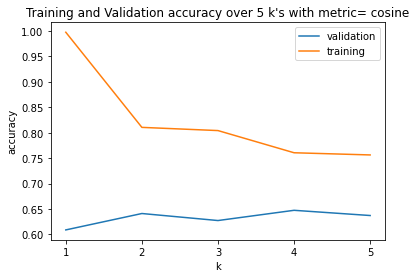

In [20]:
k = np.arange(1,6)
plt.plot(k, validation_accuracy, label = "validation")
plt.plot(k, train_accuracy, label = "training")
plt.xticks(np.arange(1, 6, 1.0))
plt.xlabel("k")
plt.ylabel('accuracy')
plt.legend()
plt.title("Training and Validation accuracy over 5 k's with metric= cosine")
plt.show()

In [21]:
print("The k value that maximizes the validation accuracy is {}".format(np.argmax(validation_accuracy)+1))
max(validation_accuracy)

The k value that maximizes the validation accuracy is 4


0.6474466153919648